## 14. (coding) Transfer learning VGG16 + cifar 10

You have to install Tensorflow library first. (Tensorflow includes keras)

1) Complete the following code


In [5]:
from keras import datasets, layers, models
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = train_images / 255
test_images = test_images / 255 

num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [6]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout
from keras.optimizers import Adam

vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in vgg16.layers:
    layer.trainable = False

x = vgg16.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=vgg16.input, outputs=x)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 168s 215ms/step - accuracy: 0.2236 - loss: 2.1350 - val_accuracy: 0.4627 - val_loss: 1.6018
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 176s 225ms/step - accuracy: 0.4359 - loss: 1.6234 - val_accuracy: 0.5017 - val_loss: 1.4550
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 178s 227ms/step - accuracy: 0.4748 - loss: 1.5119 - val_accuracy: 0.5211 - val_loss: 1.3896
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 169s 216ms/step - accuracy: 0.4998 - loss: 1.4368 - val_accuracy: 0.5337 - val_loss: 1.3452
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 170s 217ms/step - accuracy: 0.5186 - loss: 1.3871 - val_accuracy: 0.5438 - val_loss: 1.3148
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 170s 218ms/step - accuracy: 0.5321 - loss: 1.3530 - val_accuracy: 0.5511 - val_loss: 1.2902
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 172s 219ms/step - accuracy: 0.5402 - loss: 1.3198 - val_accuracy: 0.5570 - val_loss: 1.2706
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 175s 224ms/step - accuracy: 0.5513 -

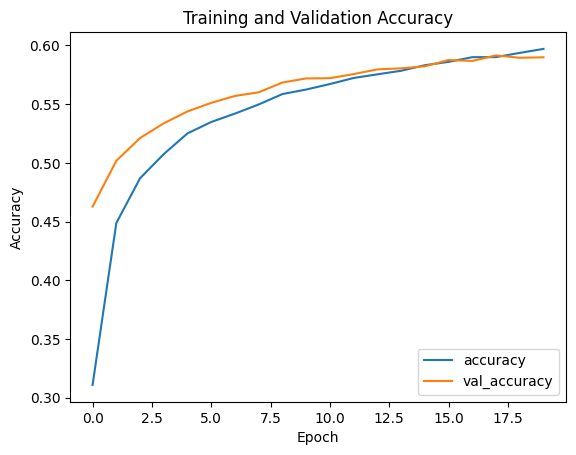

313/313 - 35s - 111ms/step - accuracy: 0.5899 - loss: 1.1631
Test accuracy: 0.589900016784668


In [7]:
# Train the model
history = model.fit(
    train_images, train_labels,
    validation_data=(test_images, test_labels),
    epochs=20,  
    batch_size=64,  
    verbose=1
)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

### 14.1) - 1

In [2]:
from keras.datasets import cifar10
from keras.utils import to_categorical

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print("Original train_labels shape:", train_labels.shape)  
print("Original test_labels shape:", test_labels.shape)    

train_labels = train_labels.reshape(-1)
test_labels = test_labels.reshape(-1)

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

train_images = train_images / 255.0
test_images = test_images / 255.0

X_train = train_images
X_test = test_images
Y_train = train_labels
Y_test = test_labels

print("Shape of X_train:", X_train.shape)  
print("Shape of Y_train:", Y_train.shape)  
print("Shape of X_test:", X_test.shape)    
print("Shape of Y_test:", Y_test.shape)    

Original train_labels shape: (50000, 1)
Original test_labels shape: (10000, 1)
Shape of X_train: (50000, 32, 32, 3)
Shape of Y_train: (50000, 10)
Shape of X_test: (10000, 32, 32, 3)
Shape of Y_test: (10000, 10)


### 14.1) - 2

Shape of train_images: (50000, 32, 32, 3)
Shape of train_labels: (50000, 10, 10)
Shape of test_images: (10000, 32, 32, 3)
Shape of test_labels: (10000, 10, 10)


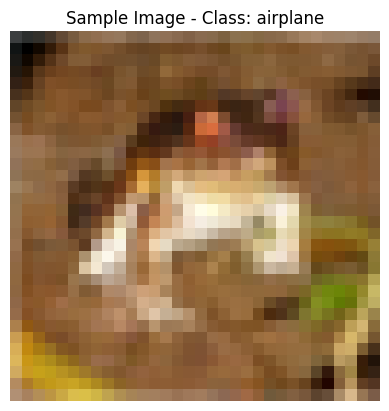

In [9]:
print("Shape of train_images:", train_images.shape)
print("Shape of train_labels:", train_labels.shape)
print("Shape of test_images:", test_images.shape)
print("Shape of test_labels:", test_labels.shape)

import matplotlib.pyplot as plt

sample_image = train_images[0]
sample_label = np.argmax(train_labels[0])  

plt.imshow(sample_image)
plt.title(f"Sample Image - Class: {class_names[sample_label]}")
plt.axis('off')
plt.show()

In [11]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout

def create_model(input_shape, fine_tune=0):
    conv_base = VGG16(include_top=False,
                      weights='imagenet',
                      input_shape=input_shape)
    
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False
    
    model = Sequential([
        conv_base,
        Flatten(),  
        Dense(256, activation='relu'), 
        Dropout(0.5),  
        Dense(10, activation='softmax')  
    ])
    
    return model

In [13]:
input_shape = (32, 32, 3)

model = create_model(input_shape=input_shape, fine_tune=4)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 7,213,322 (27.52 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

### 14.1) - 3

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input

def create_custom_model(input_shape):
    model = Sequential()
    
    model.add(Input(shape=input_shape))
    
    model.add(Flatten())
    
    model.add(Dense(20, activation='relu'))
    
    model.add(Dense(10, activation='relu'))
    
    model.add(Dense(10, activation='softmax'))
    
    return model

In [17]:
input_shape = (32, 32, 3)

model = create_custom_model(input_shape)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 20)             │        61,460 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,780 (241.33 KB)

 Trainable params: 61,780 (241.33 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout

def create_model(input_shape, fine_tune=0):
    conv_base = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
    
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    dense_layer_1 = Dense(20, activation='relu')  
    dense_layer_2 = Dense(10, activation='relu')  
    output_layer = Dense(10, activation='softmax')  
    
    model = Sequential([
        conv_base,
        Flatten(),
        dense_layer_1,
        dense_layer_2,
        output_layer
    ])
    
    return model

input_shape = X_train[0].shape  

model = create_model(input_shape, fine_tune=0)

print(model.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 20)             │        10,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,725,268 (56.17 MB)

 Trainable params: 10,580 (41.33 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


### 14.4) - 4

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 148s 188ms/step - accuracy: 0.1236 - loss: 2.2824 - val_accuracy: 0.1999 - val_loss: 2.1886
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 169s 216ms/step - accuracy: 0.2409 - loss: 2.1306 - val_accuracy: 0.3068 - val_loss: 1.9726
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 175s 224ms/step - accuracy: 0.3263 - loss: 1.9247 - val_accuracy: 0.3508 - val_loss: 1.8149
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 176s 226ms/step - accuracy: 0.3699 - loss: 1.7766 - val_accuracy: 0.3834 - val_loss: 1.7049
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 175s 223ms/step - accuracy: 0.4032 - loss: 1.6672 - val_accuracy: 0.4189 - val_loss: 1.6263
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 171s 219ms/step - accuracy: 0.4359 - loss: 1.5979 - val_accuracy: 0.4512 - val_loss: 1.5718
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 171s 218ms/step - accuracy: 0.4588 - loss: 1.5490 - val_accuracy: 0.4703 - val_loss: 1.5308
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 171s 219ms/step - accuracy: 0.4770 -

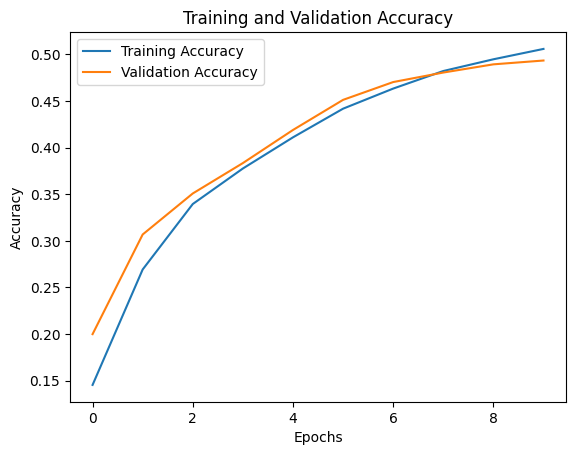

In [5]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Function to create the model
def create_model(input_shape, fine_tune=0):
    # Load the VGG16 model without the fully connected layers
    conv_base = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
    
    # Fine-tune the model based on the specified number of layers
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False
    
    # Add custom dense layers for CIFAR-10 classification
    model = Sequential([
        conv_base,
        Flatten(),
        Dense(20, activation='relu'),  # Dense layer with 20 nodes
        Dense(10, activation='relu'),  # Dense layer with 10 nodes
        Dense(10, activation='softmax')  # Output layer for 10 classes
    ])
    
    return model

# Create the model
input_shape = X_train[0].shape  # Use the shape of your preprocessed data
model = create_model(input_shape=input_shape, fine_tune=0)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Adam optimizer with a small learning rate
    loss='categorical_crossentropy',      # Cross-entropy loss for multi-class classification
    metrics=['accuracy']                  # Track accuracy during training
)

# Train the model
history = model.fit(
    X_train, Y_train,                     
    validation_data=(X_test, Y_test),     
    epochs=10,                            
    batch_size=64,                        
    verbose=1                             
)

test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=2)

print(f"Test Accuracy: {test_accuracy:.2f}")

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

### 2) [4 pts] change the number of layers you want to freeze. Plot a graph accuracy vs number of trainable layers. What is the optimal number of layers?

Training with 0 trainable layers...
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 169s 215ms/step - accuracy: 0.1535 - loss: 2.2428 - val_accuracy: 0.2858 - val_loss: 1.9973
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 170s 217ms/step - accuracy: 0.3197 - loss: 1.9334 - val_accuracy: 0.3780 - val_loss: 1.7835
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 171s 219ms/step - accuracy: 0.3900 - loss: 1.7489 - val_accuracy: 0.4152 - val_loss: 1.6658
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 175s 224ms/step - accuracy: 0.4267 - loss: 1.6401 - val_accuracy: 0.4418 - val_loss: 1.5960
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 170s 218ms/step - accuracy: 0.4520 - loss: 1.5737 - val_accuracy: 0.4594 - val_loss: 1.5446
Test Accuracy with 0 trainable layers: 0.46
Training with 4 trainable layers...
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 293s 374ms/step - accuracy: 0.4098 - loss: 1.7390 - val_accuracy: 0.6047 - val_loss: 1.1792
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 311s 397ms/step - accuracy: 0.6390 - loss: 1.0705 - val_acc

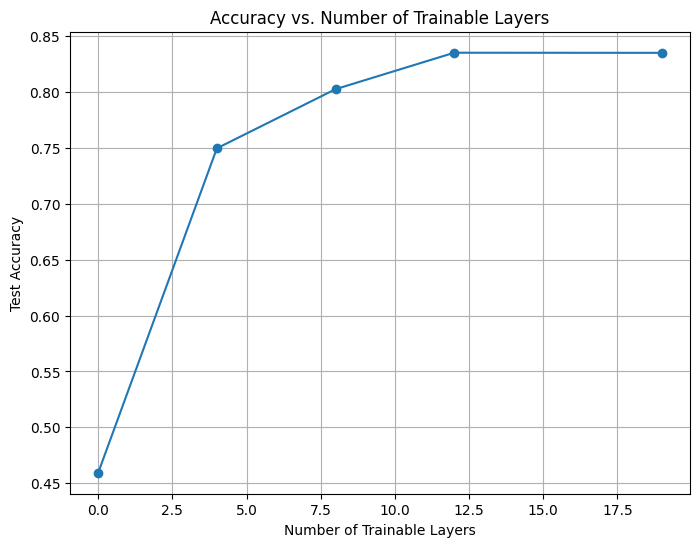

The optimal number of trainable layers is: 12


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import Adam

def create_model(input_shape, fine_tune=0):
    conv_base = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
    
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False
    
    model = Sequential([
        conv_base,
        Flatten(),
        Dense(20, activation='relu'),
        Dense(10, activation='relu'),
        Dense(10, activation='softmax')
    ])
    
    return model

trainable_layers = [0, 4, 8, 12, len(VGG16(include_top=False).layers)] 
accuracy_results = []

input_shape = X_train[0].shape 

for fine_tune in trainable_layers:
    print(f"Training with {fine_tune} trainable layers...")
    
    model = create_model(input_shape=input_shape, fine_tune=fine_tune)
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    history = model.fit(
        X_train, Y_train,
        validation_data=(X_test, Y_test),
        epochs=5,             
        batch_size=64,
        verbose=1
    )
    
    test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
    accuracy_results.append(test_accuracy)
    print(f"Test Accuracy with {fine_tune} trainable layers: {test_accuracy:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(trainable_layers, accuracy_results, marker='o')
plt.title('Accuracy vs. Number of Trainable Layers')
plt.xlabel('Number of Trainable Layers')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()

optimal_layers = trainable_layers[np.argmax(accuracy_results)]
print(f"The optimal number of trainable layers is: {optimal_layers}")

### 3) [bonus 8 pts] Use mnist dataset as an input and repeat above process.

Training with 0 trainable layers...
Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 204ms/step - accuracy: 0.1418 - loss: 2.2805 - val_accuracy: 0.2145 - val_loss: 2.1934
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 33s 210ms/step - accuracy: 0.2804 - loss: 2.1601 - val_accuracy: 0.3630 - val_loss: 2.0819
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 33s 213ms/step - accuracy: 0.3747 - loss: 2.0429 - val_accuracy: 0.3495 - val_loss: 1.9332
Test Accuracy with 0 trainable layers: 0.35
Training with 4 trainable layers...
Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 54s 339ms/step - accuracy: 0.4294 - loss: 1.4562 - val_accuracy: 0.6660 - val_loss: 0.6376
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 53s 337ms/step - accuracy: 0.6911 - loss: 0.5555 - val_accuracy: 0.8670 - val_loss: 0.4801
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 53s 338ms/step - accuracy: 0.9094 - loss: 0.3180 - val_accuracy: 0.9535 - val_loss: 0.2164
Test Accuracy with 4 trainable layers: 0.95
Training with 8 trainable layers...
Epoch 1/3
157/157 ━━━━━━

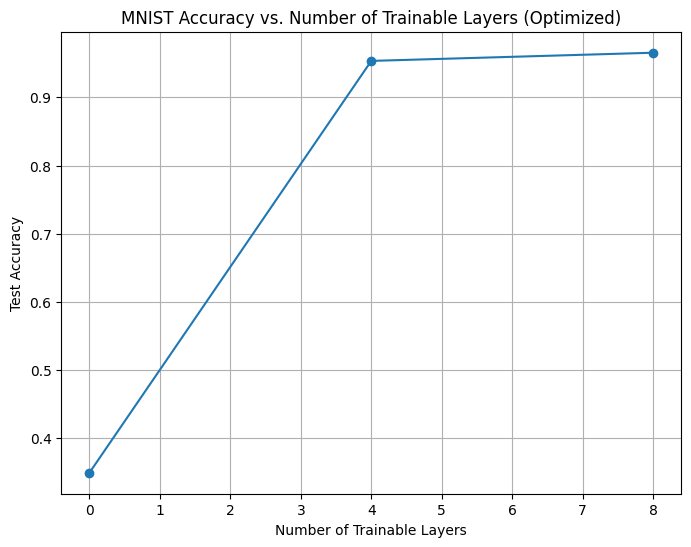

The optimal number of trainable layers for MNIST is: 8


In [8]:
small_train_images = X_train[:10000]  
small_train_labels = Y_train[:10000]

small_test_images = X_test[:2000]  
small_test_labels = Y_test[:2000]

trainable_layers = [0, 4, 8]  
accuracy_results = []

for fine_tune in trainable_layers:
    print(f"Training with {fine_tune} trainable layers...")
    
    model = create_model(input_shape=input_shape, fine_tune=fine_tune)
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    history = model.fit(
        small_train_images, small_train_labels,
        validation_data=(small_test_images, small_test_labels),
        epochs=3,  
        batch_size=64,
        verbose=1
    )
    
    test_loss, test_accuracy = model.evaluate(small_test_images, small_test_labels, verbose=0)
    accuracy_results.append(test_accuracy)
    print(f"Test Accuracy with {fine_tune} trainable layers: {test_accuracy:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(trainable_layers, accuracy_results, marker='o')
plt.title('MNIST Accuracy vs. Number of Trainable Layers (Optimized)')
plt.xlabel('Number of Trainable Layers')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()

optimal_layers = trainable_layers[np.argmax(accuracy_results)]
print(f"The optimal number of trainable layers for MNIST is: {optimal_layers}")

## 15

### 15.1 - 1 Compute the derivative with respect to x

In [9]:
def f_der_x(x):
    '''
    Compute the derivative of f(x, y) with respect to x.
    '''
    return 2*x + 3  

### 15.1 - 2 Compute the derivative with respect to y

In [10]:
def f_der_y(y):
    '''
    Compute the derivative of f(x, y) with respect to y.
    '''
    return 2  

### 15.1 - 3 Implement RMSProp

In [15]:
gamma = 0.8  
lrate = 0.01 
epsilon = 1e-8  

gt_x = 0  
gt_y = 0 

x, y = 10.0, -10.0
no_iterations = 100 

for i in range(no_iterations):
    grad_x = f_der_x(x) 
    grad_y = f_der_y(y) 

    gt_x = gamma * gt_x + (1 - gamma) * (grad_x ** 2)
    gt_y = gamma * gt_y + (1 - gamma) * (grad_y ** 2)

    x = x - (lrate / np.sqrt(gt_x + epsilon)) * grad_x
    y = y - (lrate / np.sqrt(gt_y + epsilon)) * grad_y

    print(f"Iteration = {i + 1}: x = {x:.4f}, y = {y:.4f}, f(x, y) = {f(x, y):.4f}")

Iteration = 1: x = 9.9776, y = -10.0224, f(x, y) = 109.4415
Iteration = 2: x = 9.9610, y = -10.0390, f(x, y) = 109.0262
Iteration = 3: x = 9.9467, y = -10.0533, f(x, y) = 108.6701
Iteration = 4: x = 9.9337, y = -10.0664, f(x, y) = 108.3468
Iteration = 5: x = 9.9215, y = -10.0786, f(x, y) = 108.0442
Iteration = 6: x = 9.9099, y = -10.0902, f(x, y) = 107.7557
Iteration = 7: x = 9.8987, y = -10.1014, f(x, y) = 107.4773
Iteration = 8: x = 9.8878, y = -10.1124, f(x, y) = 107.2062
Iteration = 9: x = 9.8770, y = -10.1232, f(x, y) = 106.9407
Iteration = 10: x = 9.8665, y = -10.1337, f(x, y) = 106.6795
Iteration = 11: x = 9.8561, y = -10.1442, f(x, y) = 106.4217
Iteration = 12: x = 9.8457, y = -10.1546, f(x, y) = 106.1664
Iteration = 13: x = 9.8355, y = -10.1648, f(x, y) = 105.9132
Iteration = 14: x = 9.8253, y = -10.1751, f(x, y) = 105.6618
Iteration = 15: x = 9.8151, y = -10.1853, f(x, y) = 105.4117
Iteration = 16: x = 9.8050, y = -10.1954, f(x, y) = 105.1627
Iteration = 17: x = 9.7949, y = -

### 15.1) - 4 Show final x value and f value

In [14]:
print(f"\nFinal values after {no_iterations} iterations:")
print(f"x = {x:.4f}, y = {y:.4f}, f(x, y) = {f(x, y):.4f}")


Final values after 100 iterations:
x = 8.9675, y = -11.0360, f(x, y) = 85.2469


## 2) [bonus 4 pts] Add L2 regularization. You have to modify f, f_der_x, f-der_y functions.

In [16]:
import numpy as np

lmbda = 0.1 

def f(x, y):
    return x**2 + 2*y + 3*x + (lmbda / 2) * (x**2 + y**2)

def f_der_x(x):
    return 2*x + 3 + lmbda * x

def f_der_y(y):
    return 2 + lmbda * y

gamma = 0.8  
lrate = 0.01  
epsilon = 1e-8  

gt_x = 0  
gt_y = 0  

x, y = 10.0, -10.0
no_iterations = 100  

for i in range(no_iterations):
    grad_x = f_der_x(x)  
    grad_y = f_der_y(y)  

    gt_x = gamma * gt_x + (1 - gamma) * (grad_x ** 2)
    gt_y = gamma * gt_y + (1 - gamma) * (grad_y ** 2)

    x = x - (lrate / np.sqrt(gt_x + epsilon)) * grad_x
    y = y - (lrate / np.sqrt(gt_y + epsilon)) * grad_y

    print(f"Iteration = {i + 1}: x = {x:.4f}, y = {y:.4f}, f(x, y) = {f(x, y):.4f}")

print(f"\nFinal values after {no_iterations} iterations:")
print(f"x = {x:.4f}, y = {y:.4f}, f(x, y) = {f(x, y):.4f}")

Iteration = 1: x = 9.9776, y = -10.0224, f(x, y) = 119.4415
Iteration = 2: x = 9.9610, y = -10.0390, f(x, y) = 119.0264
Iteration = 3: x = 9.9467, y = -10.0533, f(x, y) = 118.6704
Iteration = 4: x = 9.9337, y = -10.0663, f(x, y) = 118.3473
Iteration = 5: x = 9.9215, y = -10.0785, f(x, y) = 118.0450
Iteration = 6: x = 9.9099, y = -10.0901, f(x, y) = 117.7568
Iteration = 7: x = 9.8987, y = -10.1013, f(x, y) = 117.4786
Iteration = 8: x = 9.8878, y = -10.1122, f(x, y) = 117.2079
Iteration = 9: x = 9.8770, y = -10.1229, f(x, y) = 116.9427
Iteration = 10: x = 9.8665, y = -10.1335, f(x, y) = 116.6818
Iteration = 11: x = 9.8561, y = -10.1439, f(x, y) = 116.4243
Iteration = 12: x = 9.8457, y = -10.1542, f(x, y) = 116.1694
Iteration = 13: x = 9.8355, y = -10.1645, f(x, y) = 115.9167
Iteration = 14: x = 9.8253, y = -10.1747, f(x, y) = 115.6656
Iteration = 15: x = 9.8151, y = -10.1848, f(x, y) = 115.4160
Iteration = 16: x = 9.8050, y = -10.1949, f(x, y) = 115.1674
Iteration = 17: x = 9.7949, y = -

### 3) [bonus 8 pts] Implement AdaDelta. You have to define the following S_t and modify the update rule.

In [17]:
import numpy as np

def f(x, y):
    return x**2 + 2*y + 3*x

def f_der_x(x):
    return 2*x + 3  

def f_der_y(y):
    return 2  

gamma = 0.8  
epsilon = 1e-8  

gt_x = 0  
gt_y = 0  
st_x = 0  
st_y = 0  

x, y = 10.0, -10.0
no_iterations = 100

for i in range(no_iterations):
    grad_x = f_der_x(x)
    grad_y = f_der_y(y)

    gt_x = gamma * gt_x + (1 - gamma) * (grad_x ** 2)
    gt_y = gamma * gt_y + (1 - gamma) * (grad_y ** 2)

    delta_x = - (np.sqrt(st_x + epsilon) / np.sqrt(gt_x + epsilon)) * grad_x
    delta_y = - (np.sqrt(st_y + epsilon) / np.sqrt(gt_y + epsilon)) * grad_y

    st_x = gamma * st_x + (1 - gamma) * (delta_x ** 2)
    st_y = gamma * st_y + (1 - gamma) * (delta_y ** 2)

    x += delta_x
    y += delta_y

    print(f"Iteration = {i + 1}: x = {x:.4f}, y = {y:.4f}, f(x, y) = {f(x, y):.4f}")

print(f"\nFinal values after {no_iterations} iterations:")
print(f"x = {x:.4f}, y = {y:.4f}, f(x, y) = {f(x, y):.4f}")

Iteration = 1: x = 9.9998, y = -10.0002, f(x, y) = 109.9944
Iteration = 2: x = 9.9995, y = -10.0005, f(x, y) = 109.9885
Iteration = 3: x = 9.9993, y = -10.0007, f(x, y) = 109.9824
Iteration = 4: x = 9.9990, y = -10.0010, f(x, y) = 109.9761
Iteration = 5: x = 9.9988, y = -10.0012, f(x, y) = 109.9697
Iteration = 6: x = 9.9985, y = -10.0015, f(x, y) = 109.9632
Iteration = 7: x = 9.9983, y = -10.0017, f(x, y) = 109.9565
Iteration = 8: x = 9.9980, y = -10.0020, f(x, y) = 109.9497
Iteration = 9: x = 9.9977, y = -10.0023, f(x, y) = 109.9428
Iteration = 10: x = 9.9974, y = -10.0026, f(x, y) = 109.9358
Iteration = 11: x = 9.9971, y = -10.0029, f(x, y) = 109.9287
Iteration = 12: x = 9.9969, y = -10.0031, f(x, y) = 109.9216
Iteration = 13: x = 9.9966, y = -10.0034, f(x, y) = 109.9143
Iteration = 14: x = 9.9963, y = -10.0037, f(x, y) = 109.9069
Iteration = 15: x = 9.9960, y = -10.0040, f(x, y) = 109.8995
Iteration = 16: x = 9.9957, y = -10.0043, f(x, y) = 109.8919
Iteration = 17: x = 9.9954, y = -

## 16 (coding) Bayesian optimization

#### 16.1) - 1

In [34]:
import numpy as np

def rbf_kernel(X1, X2, lambda_=1.0):
    '''
    Compute the RBF (Gaussian) kernel matrix.
    X1: numpy array of shape (n,) or (n, 1)
    X2: numpy array of shape (m,) or (m, 1)
    lambda_: float, kernel coefficient for RBF
    Returns:
    K: numpy array of shape (n, m)
    '''
    X1 = np.atleast_2d(X1)
    X2 = np.atleast_2d(X2)

    sq_dist = np.sum(X1**2, axis=1).reshape(-1, 1) + np.sum(X2**2, axis=1) - 2 * np.dot(X1, X2.T)
    
    K = np.exp(-lambda_ * sq_dist)

    return K

In [35]:
X1 = np.array([[1], [2], [3]])
X2 = np.array([[1], [2]])

K = rbf_kernel(X1, X2, lambda_=1.0)
print("RBF Kernel Matrix:\n", K)

RBF Kernel Matrix:
 [[1.         0.36787944]
 [0.36787944 1.        ]
 [0.01831564 0.36787944]]


#### 16.1) - 2

In [41]:
import numpy as np

def rbf_kernel(X1, X2, lambda_=1.0):
    '''
    Compute the RBF kernel matrix.
    X1: numpy array of shape (n,) or (n, 1)
    X2: numpy array of shape (m,) or (m, 1)
    lambda_: float, kernel coefficient for RBF
    Returns:
    K: numpy array of shape (n, m)
    '''
    X1 = np.atleast_2d(X1)
    X2 = np.atleast_2d(X2)
    sq_dist = np.sum(X1**2, axis=1).reshape(-1, 1) + np.sum(X2**2, axis=1) - 2 * np.dot(X1, X2.T)
    K = np.exp(-lambda_ * sq_dist)
    return K

def gaussian_regression(X_train, y_train, X_test, lambda_=1.0):
    '''
    Perform Gaussian Process Regression.
    X_train: numpy array of shape (n,)
    y_train: numpy array of shape (n,)
    X_test: numpy array of shape (m,)
    lambda_: float, kernel coefficient for RBF
    Returns:
    mu: numpy array of shape (m,) - mean of X_test
    cov: numpy array of shape (m, m) - covariance of X_test
    '''
    K_train_train = rbf_kernel(X_train, X_train, lambda_)
    
    K_train_train += 1e-8 * np.eye(K_train_train.shape[0])
    
    K_train_train_inv = np.linalg.inv(K_train_train)
    
    K_test_train = rbf_kernel(X_test, X_train, lambda_)
    
    K_test_test = rbf_kernel(X_test, X_test, lambda_)
    
    mu = np.dot(np.dot(K_test_train, K_train_train_inv), y_train)
    
    cov = K_test_test - np.dot(np.dot(K_test_train, K_train_train_inv), K_test_train.T)
    
    return mu, cov

In [42]:
X_train = np.array([[1], [3], [5], [6], [7], [8]])
y_train = np.cos(X_train).ravel()  # True function: cosine

X_test = np.array([[2.2], [3.4]])

mu, cov = gaussian_regression(X_train, y_train, X_test, lambda_=1.0)

print("Posterior Mean (mu):", mu)
print("Posterior Covariance (cov):", cov)

Posterior Mean (mu): [-0.39531447 -0.84839354]
Posterior Covariance (cov): [[ 0.67019454 -0.20890632]
 [-0.20890632  0.2692626 ]]


#### 16.1) - 3

In [43]:
def true_function(X):
    return np.cos(X)

X_train = np.array([[1], [3], [5], [6], [7], [8]])
y_train = true_function(X_train).ravel()

X_test = np.array([[2.2]])

mu, cov = gaussian_regression(X_train, y_train, X_test, lambda_=1.0)

std_dev = np.sqrt(np.diag(cov))

print("Posterior Mean (mu):", mu)
print("Posterior Covariance (cov):", cov)
print("Standard Deviation (s.d.):", std_dev)

Posterior Mean (mu): [-0.39531447]
Posterior Covariance (cov): [[0.67019454]]
Standard Deviation (s.d.): [0.8186541]


### 2) [4 pts] Now change X_test to X_test=np.array([[3.4]]). Compute mean and s.d. of X_test=3.4.

In [44]:
X_test = np.array([[3.4]])

mu, cov = gaussian_regression(X_train, y_train, X_test, lambda_=1.0)

std_dev = np.sqrt(np.diag(cov))

print("Posterior Mean (mu) for X_test=3.4:", mu)
print("Posterior Covariance (cov) for X_test=3.4:", cov)
print("Standard Deviation (s.d.) for X_test=3.4:", std_dev)

Posterior Mean (mu) for X_test=3.4: [-0.84839354]
Posterior Covariance (cov) for X_test=3.4: [[0.2692626]]
Standard Deviation (s.d.) for X_test=3.4: [0.51890519]


### 3) [6 pts] Now X_test=np.array([[2.2]]) is changed as follows.
X_test = np.linspace(0, 10, 10).reshape(-1, 1)
By using Gaussian regression, show the mean value vector μ^* and s.d. vector for X_test, respectively.


In [45]:
X_test = np.linspace(0, 10, 10).reshape(-1, 1)

mu, cov = gaussian_regression(X_train, y_train, X_test, lambda_=1.0)

std_dev = np.sqrt(np.diag(cov))

print("Posterior Mean (mu) for X_test:\n", mu)
print("\nPosterior Standard Deviation (s.d.) for X_test:\n", std_dev)

Posterior Mean (mu) for X_test:
 [ 0.2053855   0.52354139 -0.42107868 -0.89106394 -0.04178241  0.68955858
  0.96515623  0.00303554 -0.15922712 -0.00707273]

Posterior Standard Deviation (s.d.) for X_test:
 [0.92984995 0.15584113 0.80971013 0.44347726 0.63660947 0.3019603
 0.25098224 0.21292783 0.87663816 0.99980301]


### 4) [4 pts] After Q. 3) is finished, at the end of the program, run the following and show the Gaussian distribution of error function.

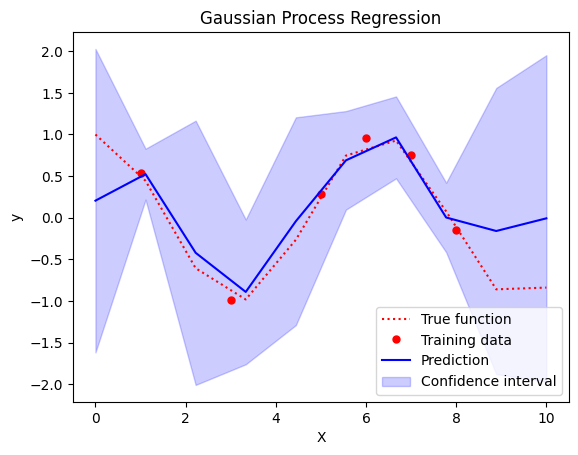

In [46]:
plt.figure()

plt.plot(X_test, true_function(X_test), 'r:', label="True function")

plt.plot(X_train, y_train, 'r.', markersize=10, label="Training data")

plt.plot(X_test, mu, 'b-', label="Prediction")

plt.fill_between(
    X_test.ravel(),
    mu - 1.96 * std_dev,
    mu + 1.96 * std_dev,
    alpha=0.2,
    color='b',
    label="Confidence interval"
)

plt.xlabel('X')
plt.ylabel('y')
plt.title('Gaussian Process Regression')
plt.legend()

plt.show()

### 5) [6 pts] (Lower Confidence Bound) For each value in X_test of Q. 3), compute lower confidence bound value.

In [49]:
kappa = 1.96  # 95% confidence level

LCB = mu - kappa * std_dev

optimal_index = np.argmin(LCB)
optimal_x = X_test[optimal_index]

print("LCB values for X_test:\n", LCB)
print("\nNext hyperparameter value (X) to evaluate based on LCB:", optimal_x)

LCB values for X_test:
 [-1.61712041  0.21809277 -2.00811055 -1.76027937 -1.28953698  0.0977164
  0.47323105 -0.41430301 -1.87743792 -1.96668663]

Next hyperparameter value (X) to evaluate based on LCB: [2.22222222]
